In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Load in Dataset

In [3]:
path = "./data/"
holidays = pd.read_csv(path+"holidays_events.csv")
holidays['date'] = pd.to_datetime(holidays['date'])

oil = pd.read_csv(path+"oil.csv")
oil['date'] = pd.to_datetime(oil['date'])
stores = pd.read_csv(path+"stores.csv")
transactions = pd.read_csv(path+"transactions.csv")
transactions['date'] = pd.to_datetime(transactions['date'])

train = pd.read_csv(path+"train.csv")
train['date'] = pd.to_datetime(train['date'])

test = pd.read_csv(path+"test.csv")
test['date'] = pd.to_datetime(test['date'])

In [4]:
holidays[holidays['transferred'] == True]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


In [5]:
holidays[holidays['type'] == "Bridge"]

,date,type,locale,locale_name,description,transferred
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
39,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False
156,2014-12-26,Bridge,National,Ecuador,Puente Navidad,False
160,2015-01-02,Bridge,National,Ecuador,Puente Primer dia del ano,False
277,2016-11-04,Bridge,National,Ecuador,Puente Dia de Difuntos,False


In [6]:
holidays.locale.value_counts()

locale
National    174
Local       152
Regional     24
Name: count, dtype: int64

In [7]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [8]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [9]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [10]:
train_trans = train.merge(transactions, left_on=['date', 'store_nbr'], right_on=['date', 'store_nbr'], how='left')

In [28]:
oil.fillna(method='ffill', inplace=True)
oil.fillna(0, inplace=True)

/var/folders/m1/rwxd3g8d2zl60slvhbm1p89w0000gn/T/ipykernel_26031/3375066606.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil.fillna(method='ffill', inplace=True)


In [56]:
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [12]:
train['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

## Exploratory Data Analysis

### Transaction

In [53]:
transactions.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


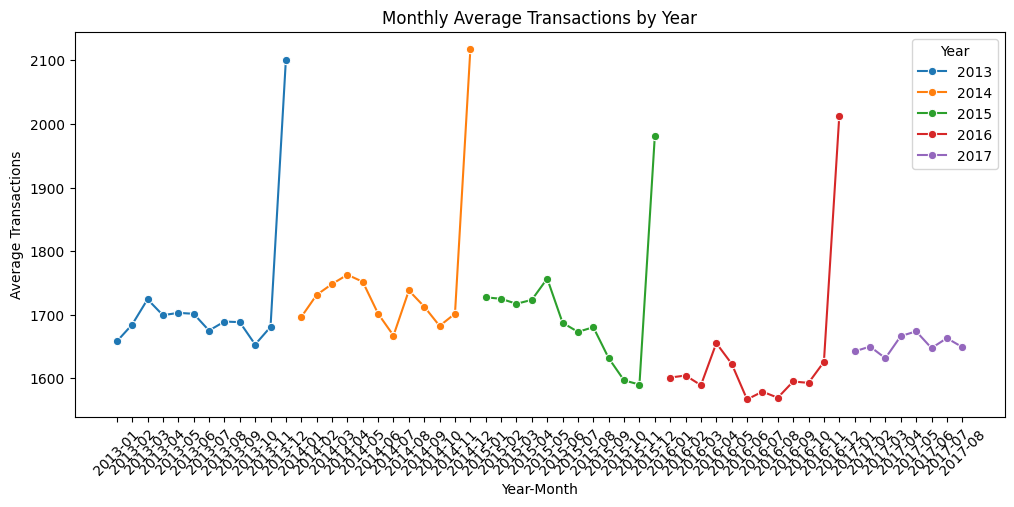

In [14]:
a = transactions.copy()
a['year_month'] = a["date"].dt.to_period("M").astype('str')
a['year'] = a.date.dt.year
a = a.groupby(['year','year_month'])[['transactions']].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 5))
sns.lineplot(data=a, x="year_month", y="transactions", hue="year", marker="o", palette="tab10")

# Formatting
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Average Transactions")
plt.title("Monthly Average Transactions by Year")
plt.legend(title="Year");

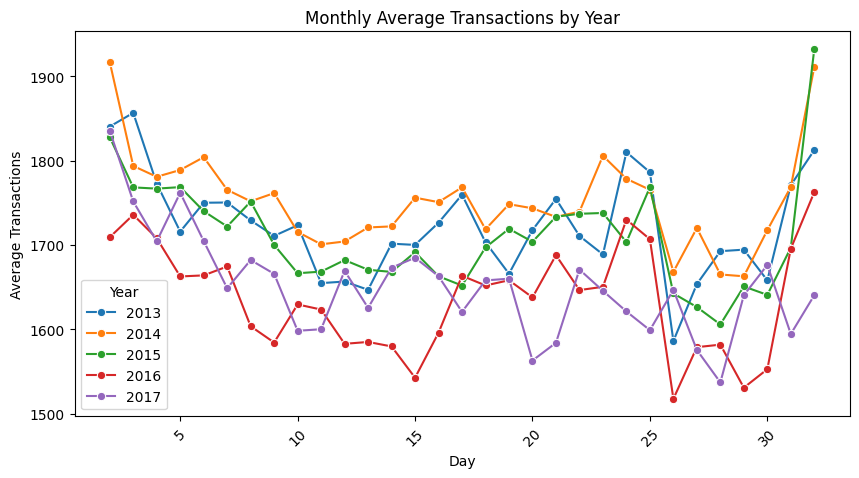

In [ ]:
a = transactions.copy()
a["year"] = a.date.dt.year
a["day"] = a.date.dt.day+1
a = a.groupby(["year", "day"]).transactions.mean().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=a, x="day", y="transactions", hue="year", marker="o", palette="tab10")

# Formatting
plt.xticks(rotation=45)
plt.xlabel("Day")
plt.ylabel("Average Transactions")
plt.title("Daily Average Transactions by Year")
plt.legend(title="Year");

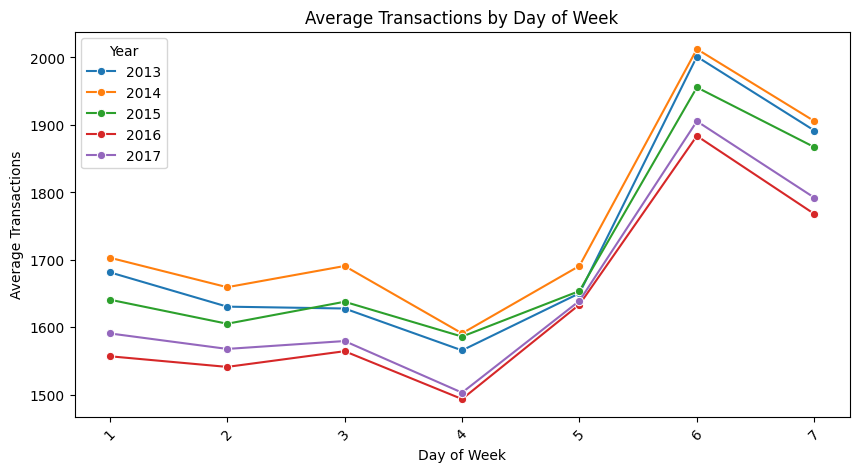

In [58]:
a = transactions.copy()
a["year"] = a.date.dt.year
a["dayofweek"] = a.date.dt.dayofweek+1
a = a.groupby(["year", "dayofweek"]).transactions.mean().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=a, x="dayofweek", y="transactions", hue="year", marker="o", palette="tab10")

# Formatting
plt.xticks(rotation=45)
plt.xlabel("Day of Week")
plt.ylabel("Average Transactions")
plt.title("Average Transactions by Day of Week")
plt.legend(title="Year");


In [62]:
a

,date,store_nbr,transactions,year_month
0,2013-01-01,25,770,2013-01
1,2013-01-02,1,2111,2013-01
2,2013-01-02,2,2358,2013-01
3,2013-01-02,3,3487,2013-01
4,2013-01-02,4,1922,2013-01
...,...,...,...,...
83483,2017-08-15,50,2804,2017-08
83484,2017-08-15,51,1573,2017-08
83485,2017-08-15,52,2255,2017-08
83486,2017-08-15,53,932,2017-08


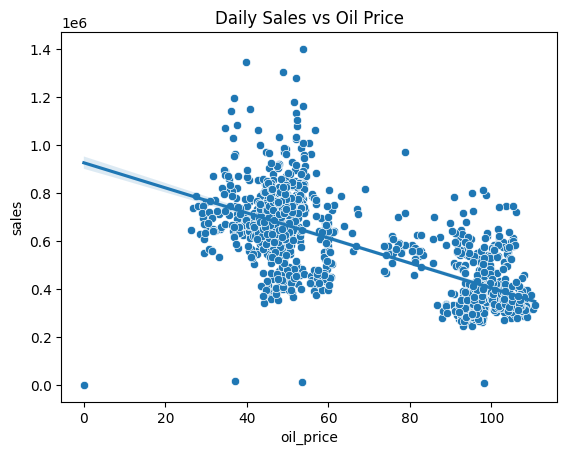

In [72]:
oil['date'] = pd.to_datetime(oil['date'])
oil = oil.rename(columns={'dcoilwtico': 'oil_price'})
oil = oil.sort_values('date')

oil['oil_price'] = oil['oil_price'].ffill()

sales_oil = train.merge(oil, on='date', how='left')

daily_sales_oil = train.groupby('date')['sales'].sum().reset_index()
daily_sales_oil = daily_sales_oil.merge(oil, on='date', how='left')

fig = sns.scatterplot(data=daily_sales_oil, x='oil_price', y='sales')
fig.set_title('Daily Sales vs Oil Price')
# plot the line of best fit
sns.regplot(data=daily_sales_oil, x='oil_price', y='sales', scatter=False)
plt.show()


In [73]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


## Baseline Model - LSTM model without feature engineering


In [46]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

In [84]:
data = pd.read_csv("sales_per_day_per_store.csv")
data['date'] = pd.to_datetime(data['date'])
data = data.merge(oil, left_on='date', right_on='date', how='left').fillna(method='ffill')
data.head()

/var/folders/m1/rwxd3g8d2zl60slvhbm1p89w0000gn/T/ipykernel_26031/3603697804.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.merge(oil, left_on='date', right_on='date', how='left').fillna(method='ffill')


,date,store_nbr,city,state,type,cluster,transactions,sales,is_holiday,oil_price,year_month
0,2013-01-01,1,Quito,Pichincha,D,13,0.0,0.0,False,0.0,2013-01
1,2013-01-01,2,Quito,Pichincha,D,13,0.0,0.0,False,0.0,2013-01
2,2013-01-01,3,Quito,Pichincha,D,8,0.0,0.0,False,0.0,2013-01
3,2013-01-01,4,Quito,Pichincha,D,9,0.0,0.0,False,0.0,2013-01
4,2013-01-01,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4,0.0,0.0,False,0.0,2013-01


In [ ]:
train['date'] = pd.to_datetime(train['date'])
family_level_data = train.merge(data, on=['date','store_nbr'], how='left')
family_level_data.head()

,date,store_nbr,family,onpromotion,city,state,type,cluster,transactions,sales,is_holiday,oil_price,year_month
0,2013-01-01,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,0.0,0.0,False,0.0,2013-01
1,2013-01-01,1,BABY CARE,0,Quito,Pichincha,D,13,0.0,0.0,False,0.0,2013-01
2,2013-01-01,1,BEAUTY,0,Quito,Pichincha,D,13,0.0,0.0,False,0.0,2013-01
3,2013-01-01,1,BEVERAGES,0,Quito,Pichincha,D,13,0.0,0.0,False,0.0,2013-01
4,2013-01-01,1,BOOKS,0,Quito,Pichincha,D,13,0.0,0.0,False,0.0,2013-01


In [48]:
# Define RMSLE Loss Function
@tf.function  # Optimize for TensorFlow execution
def rmsle(y_true, y_pred):
    """
    Root Mean Squared Logarithmic Error (RMSLE) for TensorFlow models.
    
    Args:
    y_true: Tensor of actual values.
    y_pred: Tensor of predicted values.
    
    Returns:
    RMSLE score as a Tensor.
    """
    # Ensure predictions are non-negative to avoid log(0)
    y_pred = tf.clip_by_value(y_pred, 1e-6, tf.float32.max)

    # Compute log(1 + y)
    log_true = tf.math.log1p(y_true)
    log_pred = tf.math.log1p(y_pred)

    # Compute squared differences
    squared_error = tf.square(log_pred - log_true)

    # Return RMSLE
    return tf.sqrt(tf.reduce_mean(squared_error))


In [ ]:
# Train LSTM model, the value to predict is the sales column in the data
# prepare data
def prepare_data(data, n_features):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_features
        if end_ix > len(data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# define input sequence
data = data['sales'].values
# choose a number of time steps
n_steps = 7
# split into samples





In [ ]:


# Prepare data
data = data.set_index('date')
data = data.drop(columns=['store_nbr', 'transactions', 'city', 'state', 'type'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split data
X = []
y = []
n_future = 7
n_past = 30
for i in range(n_past, len(data_scaled) - n_future +1):
    X.append(data_scaled[i - n_past:i, 0:data.shape[1]])
    y.append(data_scaled[i:i+n_future, 0])
X, y = np.array(X), np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build model, use my self defined loss function
model = keras.Sequential()
model.add(layers.LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.LSTM(units=32, return_sequences=True))
model.add(layers.LSTM(units=16))
model.add(layers.Dense(units=7))

model.compile(optimizer=keras.optimizers.Adam(0.001), loss=rmsle)

model.summary()

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

/Users/christinexu/miniforge3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,335 (130.21 KB)

 Trainable params: 33,335 (130.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4091/4091 ━━━━━━━━━━━━━━━━━━━━ 61s 14ms/step - loss: 0.2132 - val_loss: 0.0905
Epoch 2/10
2898/4091 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.1066

KeyboardInterrupt: 

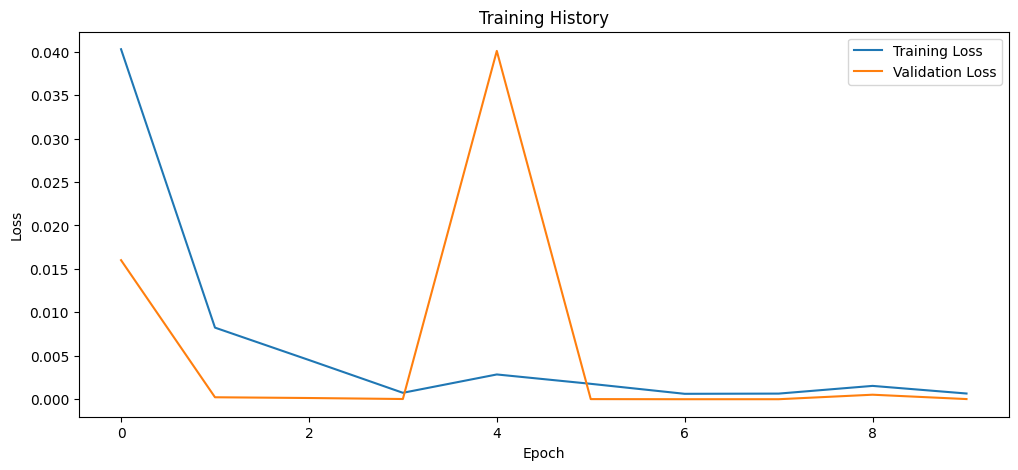

In [40]:
# Evaluate model
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [41]:
def rmsle(y_true, y_pred):
    """
    Calculate Root Mean Squared Logarithmic Error (RMSLE).
    
    Parameters:
    y_true (array-like): Actual values
    y_pred (array-like): Predicted values
    
    Returns:
    float: RMSLE score
    """
    # Convert inputs to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Compute the logarithm of (1 + values)
    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred)
    
    # Compute squared error
    squared_error = (log_pred - log_true) ** 2
    
    # Compute mean and return the root mean squared logarithmic error
    return np.sqrt(np.mean(squared_error))
